In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
pd.set_option("display.max_rows", 60, "display.max_columns", 60)

In [3]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.21.1 scipy==1.7.1 pandas==1.3.1 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6 pynndescent==0.5.4


In [4]:
results_file = "write/GSM2560245.h5ad"

In [5]:
adata = sc.read_10x_mtx('/mnt/disks/mount_dir/GSM2560245',var_names='gene_symbols',cache=True)

... reading from cache file cache/mnt-disks-mount_dir-GSM2560245-matrix.h5ad


In [6]:
adata.var_names_make_unique()

In [7]:
adata

AnnData object with n_obs × n_vars = 3639 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


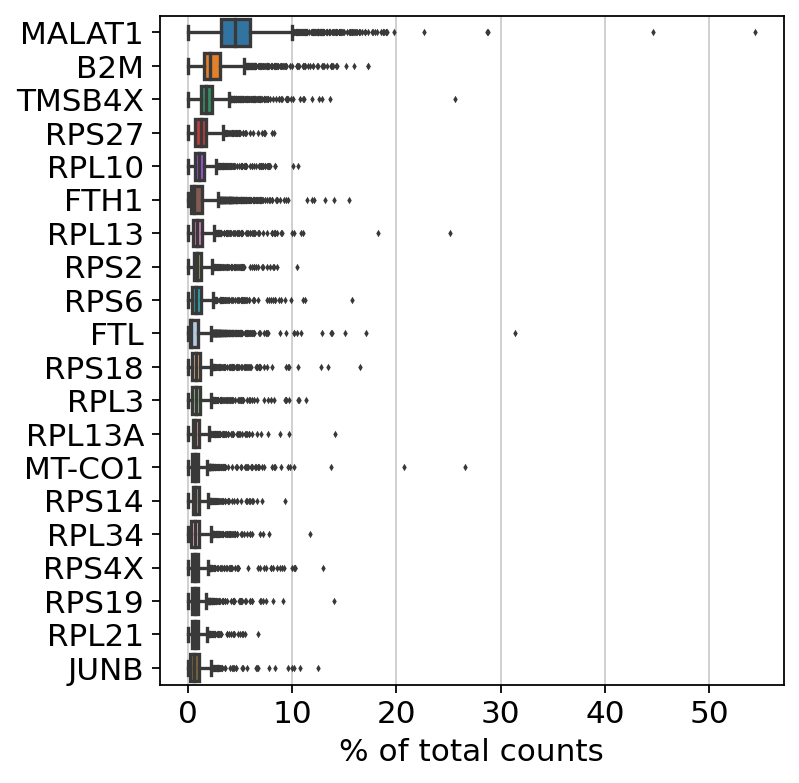

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [9]:
demuxlet=pd.read_csv('/mnt/disks/mount_dir/demuxlet_files/demuxlet_data_main.csv',delimiter='\t')

In [10]:
demuxlet_assign=demuxlet.BEST.to_list()


In [11]:
adata.obs['demuxlet_assignment']=demuxlet_assign

In [12]:
souporcell=pd.read_csv('/mnt/disks/mount_dir/soupor_out/clusters.csv', delimiter='\t')

In [13]:
souporcell['assignment'] = souporcell[['status', 'assignment']].agg('-'.join, axis=1)

In [14]:
souporcell_assign=souporcell.assignment.to_list()

In [15]:
adata.obs['souporcell_assignment']=souporcell_assign

In [16]:
adata

AnnData object with n_obs × n_vars = 3639 × 32738
    obs: 'demuxlet_assignment', 'souporcell_assignment'
    var: 'gene_ids'

In [17]:
demuxlet_assign_simple=[]
for drop in demuxlet_assign:
    if drop[0] == 'S':
        demuxlet_assign_simple.append('SNG')
    else:
        demuxlet_assign_simple.append('DBL')

In [18]:
adata.obs['demuxlet_assignment_simple']=demuxlet_assign_simple

In [19]:
souporcell_assign_simple=[]
for bar in souporcell_assign:
    if bar[0] == 's':
        souporcell_assign_simple.append('SNG')
    else:
        souporcell_assign_simple.append('DBL')

In [20]:
adata.obs['souporcell_assignment_simple']=souporcell_assign_simple

In [21]:
demuxlet_souporcell_assign=[]
for a in range(len(souporcell_assign)):
    if souporcell_assign_simple[a] == 'SNG' and demuxlet_assign_simple[a] == 'SNG':
        demuxlet_souporcell_assign.append('SNG')
    elif souporcell_assign_simple[a] == 'SNG' and demuxlet_assign_simple[a] == 'DBL':
        demuxlet_souporcell_assign.append('demuxlet_DBL')
    elif souporcell_assign_simple[a] == 'DBL' and demuxlet_assign_simple[a] == 'SNG':
        demuxlet_souporcell_assign.append('souporcell_DBL')
    else:
        demuxlet_souporcell_assign.append('DBL')
        

In [22]:
adata.obs['demuxlet_souporcell_assignment']= demuxlet_souporcell_assign

In [23]:
sample_assign=[]
for s in range(len(souporcell_assign)):
    if souporcell_assign[s] == 'singlet-0':
        sample_assign.append('1154')
    elif souporcell_assign[s] == 'singlet-1':
        sample_assign.append('1598')
    elif souporcell_assign[s] == 'singlet-2':
        sample_assign.append('1079')
    elif souporcell_assign[s] == 'singlet-3':
        sample_assign.append('1249')
    else:
        sample_assign.append('DBL')

In [24]:
adata.obs['sample_assignment']=sample_assign

In [25]:
adata.obs['sample_assignment'].value_counts()

1154    1005
1079     900
1249     815
1598     805
DBL      114
Name: sample_assignment, dtype: int64

In [27]:
adata.obs[(adata.obs['souporcell_assignment'] == 'singlet-2')&(adata.obs['demuxlet_assignment_simple'] == 'SNG')]

demuxlet_assignment souporcell_assignment  \
AAACATACCACTCC-1            SNG-1079             singlet-2   
AAACGCACTGCTCC-1            SNG-1079             singlet-2   
AAACGCTGACGTGT-1            SNG-1079             singlet-2   
AAACGCTGGGAGCA-1            SNG-1079             singlet-2   
AAACGGCTGTGTAC-1            SNG-1079             singlet-2   
...                              ...                   ...   
TTTAGAGAGACTAC-1            SNG-1079             singlet-2   
TTTAGCTGCGTAAC-1            SNG-1079             singlet-2   
TTTAGGCTAGACTC-1            SNG-1079             singlet-2   
TTTAGGCTGGAGGT-1            SNG-1079             singlet-2   
TTTCGAACTACTTC-1            SNG-1079             singlet-2   

                 demuxlet_assignment_simple souporcell_assignment_simple  \
AAACATACCACTCC-1                        SNG                          SNG   
AAACGCACTGCTCC-1                        SNG                          SNG   
AAACGCTGACGTGT-1                        SNG                          SNG   
AAACGCTGGGAGCA-1                        SNG                          SNG   
AAACGGCTGTGTAC-1                        SNG                          SNG   
...                                     ...                          ...   
TTTAGAGAGACTAC-1                        SNG                          SNG   
TTTAGCTGCGTAAC-1                        SNG                          SNG   
TTTAGGCTAGACTC-1                        SNG                          SNG   
TTTAGGCTGGAGGT-1                        SNG                          SNG   
TTTCGAACTACTTC-1                        SNG                          SNG   

                 demuxlet_souporcell_assignment sample_assignment  
AAACATACCACTCC-1                            SNG              1079  
AAACGCACTGCTCC-1                            SNG              1079  
AAACGCTGACGTGT-1                            SNG              1079  
AAACGCTGGGAGCA-1                            SNG              1079  
AAACGGCTGTGTAC-1                            SNG              1079  
...                                         ...               ...  
TTTAGAGAGACTAC-1                            SNG              1079  
TTTAGCTGCGTAAC-1                            SNG              1079  
TTTAGGCTAGACTC-1                            SNG              1079  
TTTAGGCTGGAGGT-1                            SNG              1079  
TTTCGAACTACTTC-1                            SNG              1079  

[619 rows x 6 columns]

In [26]:
adata.obs.head(60)

demuxlet_assignment souporcell_assignment  \
AAACATACCACTCC-1             SNG-1079             singlet-2   
AAACATACCGCTAA-1             SNG-1154             singlet-0   
AAACATACTAACGC-1             SNG-1154             singlet-0   
AAACATACTTATCC-1  DBL-1311-1079-0.600             singlet-2   
AAACATTGCATGGT-1             SNG-1598          unassigned-0   
AAACCGTGTCGCAA-1             SNG-1598             singlet-1   
AAACGCACACCTCC-1             SNG-1154             singlet-0   
AAACGCACCTGCAA-1             SNG-1598             singlet-1   
AAACGCACTAGACC-1             SNG-1154             singlet-0   
AAACGCACTGCTCC-1             SNG-1079             singlet-2   
AAACGCTGAAAAGC-1             SNG-1598             singlet-1   
AAACGCTGAAACAG-1             SNG-1154             singlet-0   
AAACGCTGACGTGT-1             SNG-1079             singlet-2   
AAACGCTGGGAGCA-1             SNG-1079             singlet-2   
AAACGGCTAGAGGC-1             SNG-1154             singlet-0   
AAACGGCTGACAGG-1    DBL-18-1079-0.600             singlet-2   
AAACGGCTGTGTAC-1             SNG-1079             singlet-2   
AAACGGCTTACGAC-1             SNG-1154             singlet-0   
AAACTTGACATACG-1  DBL-1511-1079-0.600             singlet-2   
AAACTTGATTCCCG-1             SNG-1598             singlet-1   
AAAGACGAAGCCTA-1             SNG-1598             singlet-1   
AAAGACGATCCCAC-1             SNG-1598             singlet-1   
AAAGAGACCCACCT-1             SNG-1079             singlet-2   
AAAGAGACGTTCGA-1  DBL-1311-1079-0.600             singlet-2   
AAAGAGACTGGTGT-1             SNG-1154             singlet-0   
AAAGATCTCCTCCA-1             SNG-1154             singlet-0   
AAAGATCTTGCAAC-1             SNG-1249             singlet-3   
AAAGCAGATGATGC-1             SNG-1249             singlet-3   
AAAGCCTGCTCATT-1             SNG-1079             singlet-2   
AAAGCCTGCTGTGA-1             SNG-1598             singlet-1   
AAAGCCTGCTGTTT-1             SNG-1598             singlet-1   
AAAGGCCTACGCAT-1             SNG-1154             singlet-0   
AAAGGCCTGAAGGC-1             SNG-1154             singlet-0   
AAAGGCCTGTAGGG-1    DBL-21-1598-0.600             singlet-1   
AAAGGCCTGTCCTC-1             SNG-1598             singlet-1   
AAAGTTTGAACGTC-1  DBL-1511-1079-0.600             singlet-2   
AAAGTTTGCGCTAA-1             SNG-1154             singlet-0   
AAAGTTTGGGTGGA-1             SNG-1598             singlet-1   
AAAGTTTGTGCCAA-1  DBL-1286-1079-0.600             singlet-2   
AAATACTGCCGCTT-1             SNG-1079             singlet-2   
AAATACTGTGTCGA-1             SNG-1598             singlet-1   
AAATCAACCATCAG-1             SNG-1154             singlet-0   
AAATCAACTCCTAT-1  DBL-1043-1598-0.600             singlet-1   
AAATCAACTGAGGG-1             SNG-1154             singlet-0   
AAATCATGAGTTCG-1             SNG-1598             singlet-1   
AAATCATGGATACC-1    DBL-13-1079-0.600             singlet-2   
AAATCATGGTCTTT-1             SNG-1154             singlet-0   
AAATCATGTATCTC-1             SNG-1249             singlet-3   
AAATCATGTCATTC-1             SNG-1154             singlet-0   
AAATCCCTAACCTG-1             SNG-1249             singlet-3   
AAATCCCTAGGAGC-1             SNG-1154             singlet-0   
AAATCCCTATACCG-1             SNG-1154             singlet-0   
AAATCCCTATCTTC-1             SNG-1598             singlet-1   
AAATCCCTGCTTAG-1             SNG-1598             singlet-1   
AAATCTGAGATGAA-1             SNG-1154             singlet-0   
AAATCTGATGAGCT-1  DBL-1511-1079-0.600             singlet-2   
AAATCTGATGGATC-1             SNG-1598             singlet-1   
AAATCTGATGGTGT-1   DBL-101-1154-0.600             singlet-0   
AAATGGGATGAAGA-1  DBL-1311-1079-0.600             singlet-2   
AAATGTTGCTGTCC-1  DBL-1154-1249-0.600           doublet-0/3   

                 demuxlet_assignment_simple souporcell_assignment_simple  \
AAACATACCACTCC-1                        SNG                          SNG   
AAACATACCGCTAA-1      

In [27]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 97 cells that have less than 200 genes expressed
filtered out 20400 genes that are detected in less than 3 cells


In [28]:
adata.obs['demuxlet_souporcell_assignment'].value_counts()

SNG               2861
demuxlet_DBL       573
DBL                104
souporcell_DBL       4
Name: demuxlet_souporcell_assignment, dtype: int64

In [29]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'demuxlet_assignment' as categorical
/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'souporcell_assignment' as categorical
/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be remo

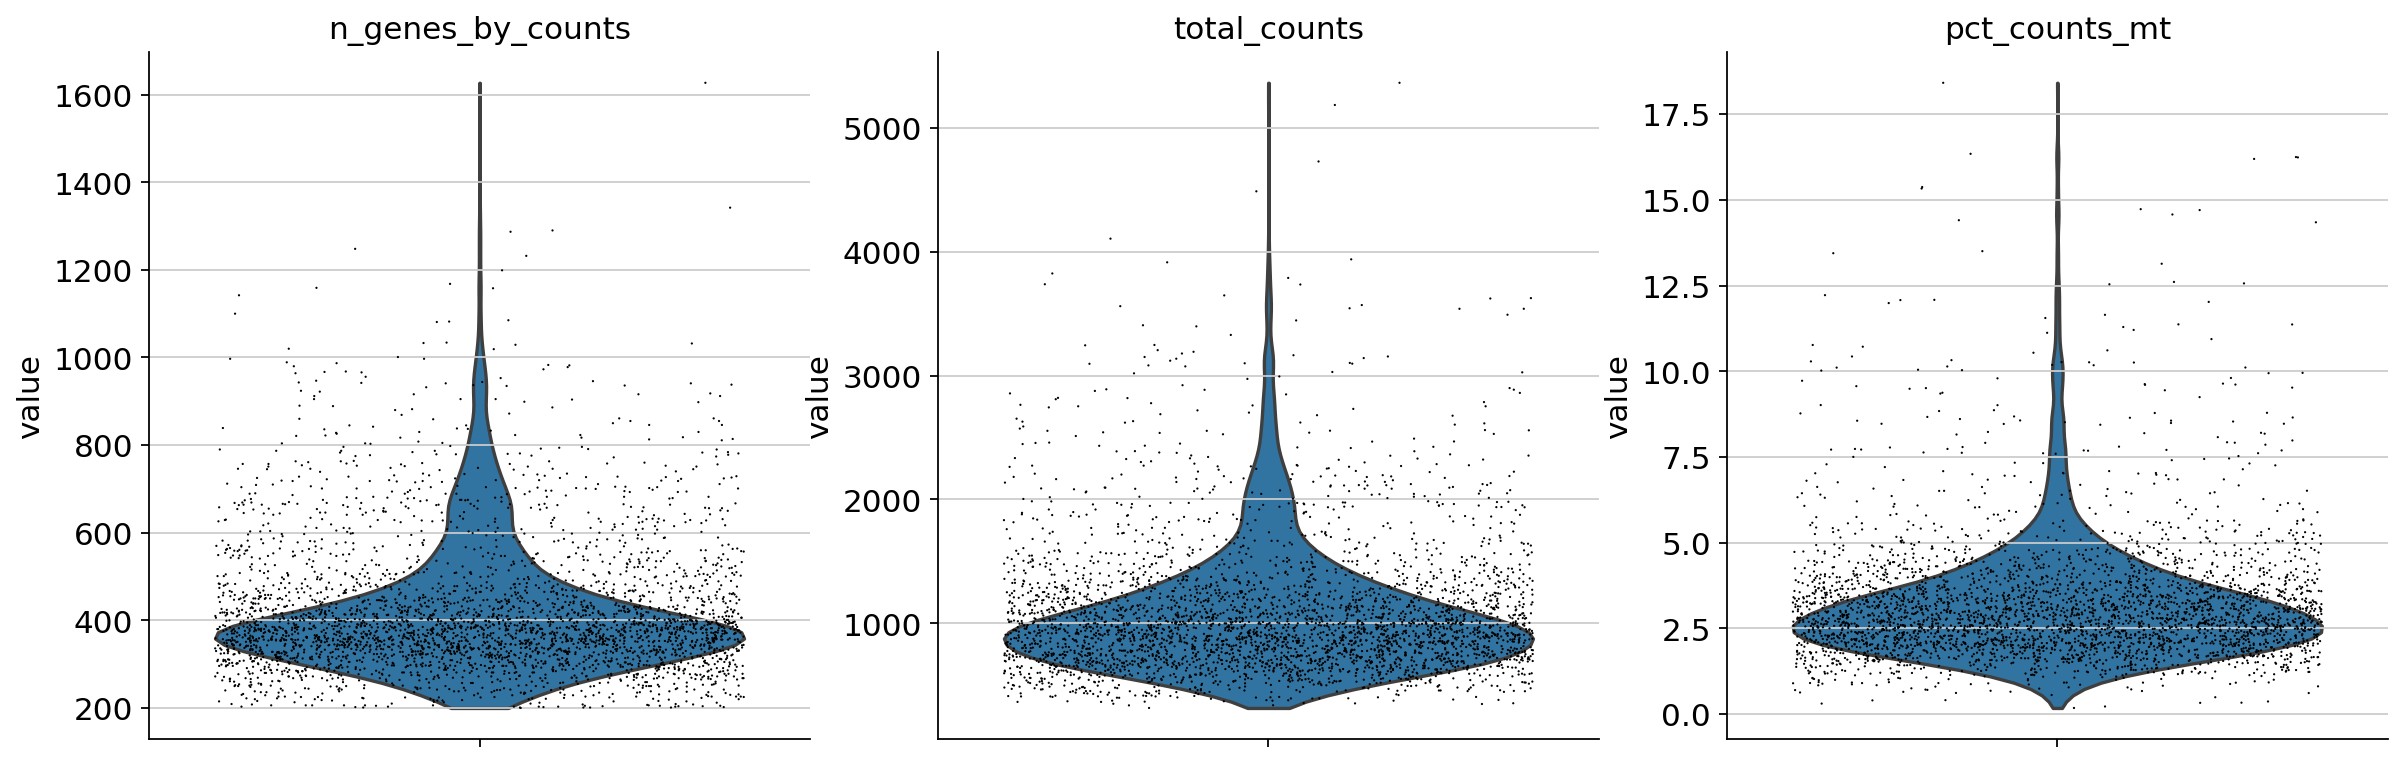

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

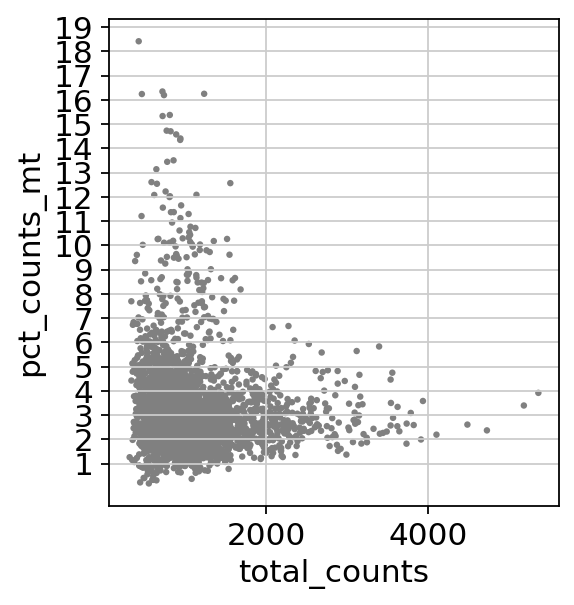

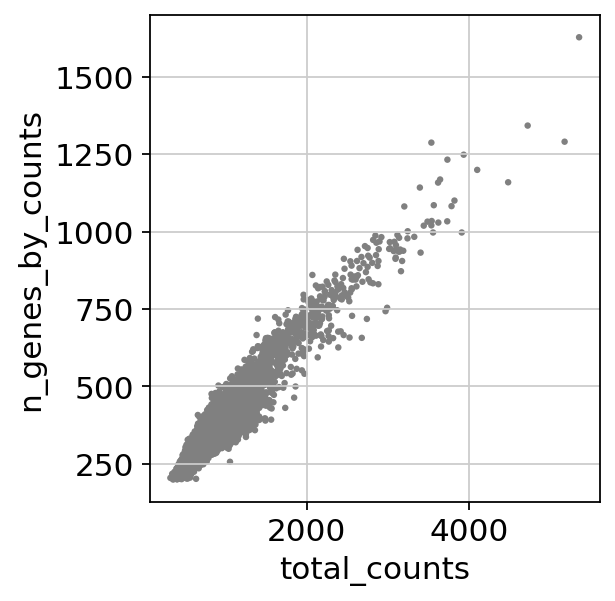

In [31]:
ax=sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',show=False)
ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [32]:
adata.obs['remove']='no'

In [33]:
removes=adata.obs.nlargest((round(len(adata.obs['n_genes_by_counts'])/100)),'n_genes_by_counts').index.to_list()
adata.obs.loc[removes,'remove'] = 'yes'

In [34]:
remove_mt=[]
count=0
for cell in adata.obs.pct_counts_mt >6:
    if cell == True:
        remove_mt.append((adata.obs.pct_counts_mt >6).index[count])
    count+=1
len(remove_mt)


193

In [35]:
adata.obs.loc[remove_mt,'remove']='yes'

In [36]:
adata.obs['remove'].value_counts()

no     3314
yes     228
Name: remove, dtype: int64

In [37]:
remove_ls = adata.obs['remove'].to_list()

In [38]:
len(remove_ls)

3542

In [39]:
demuxlet_souporcell_assign_ls = adata.obs['demuxlet_souporcell_assignment'].to_list()

In [40]:
len(demuxlet_souporcell_assign_ls)

3542

In [41]:
remove_assign=[]
for r in range(len(demuxlet_souporcell_assign_ls)):
    if demuxlet_souporcell_assign_ls[r] == 'SNG' and remove_ls[r] == 'yes':
        remove_assign.append('SNG_remove')
    elif demuxlet_souporcell_assign_ls[r] == 'DBL' and remove_ls[r] == 'yes':
        remove_assign.append('DBL_remove')
    elif demuxlet_souporcell_assign_ls[r] == 'demuxlet_DBL' and remove_ls[r] == 'yes':
        remove_assign.append('demuxlet_DBL_remove')
    elif demuxlet_souporcell_assign_ls[r] == 'souporcell_DBL' and remove_ls[r] == 'yes':
        remove_assign.append('souporcell_DBL_remove')
    elif demuxlet_souporcell_assign_ls[r] == 'SNG' and remove_ls[r] == 'no':
        remove_assign.append('SNG_keep')
    elif demuxlet_souporcell_assign_ls[r] == 'DBL' and remove_ls[r] == 'no':
        remove_assign.append('DBL_keep')
    elif demuxlet_souporcell_assign_ls[r] == 'demuxlet_DBL' and remove_ls[r] == 'no':
        remove_assign.append('demuxlet_DBL_keep')
    elif demuxlet_souporcell_assign_ls[r] == 'souporcell_DBL' and remove_ls[r] == 'no':
        remove_assign.append('souporcell_DBL_keep')

In [42]:
adata.obs['remove_assignment']=remove_assign

In [43]:
adata.obs['remove_assignment'].value_counts()

SNG_keep                 2676
demuxlet_DBL_keep         539
SNG_remove                185
DBL_keep                   96
demuxlet_DBL_remove        34
DBL_remove                  8
souporcell_DBL_keep         3
souporcell_DBL_remove       1
Name: remove_assignment, dtype: int64

In [44]:
adata.obs['remove_assignment'].value_counts(normalize=True) * 100


SNG_keep                 75.550536
demuxlet_DBL_keep        15.217391
SNG_remove                5.223038
DBL_keep                  2.710333
demuxlet_DBL_remove       0.959910
DBL_remove                0.225861
souporcell_DBL_keep       0.084698
souporcell_DBL_remove     0.028233
Name: remove_assignment, dtype: float64

In [45]:
adata.obs['demuxlet_assignment_simple'].value_counts(normalize=True) * 100

SNG    80.886505
DBL    19.113495
Name: demuxlet_assignment_simple, dtype: float64

In [46]:
adata.obs['souporcell_assignment_simple'].value_counts(normalize=True) * 100

SNG    96.950875
DBL     3.049125
Name: souporcell_assignment_simple, dtype: float64

In [47]:
adata.obs['demuxlet_souporcell_assignment'].value_counts(normalize=True) * 100

SNG               80.773574
demuxlet_DBL      16.177301
DBL                2.936194
souporcell_DBL     0.112931
Name: demuxlet_souporcell_assignment, dtype: float64

In [48]:
adata.obs['demuxlet_assignment_simple'].value_counts()

SNG    2865
DBL     677
Name: demuxlet_assignment_simple, dtype: int64

In [49]:
adata.obs['souporcell_assignment_simple'].value_counts()

SNG    3434
DBL     108
Name: souporcell_assignment_simple, dtype: int64

In [50]:
adata.obs['demuxlet_souporcell_assignment'].value_counts()

SNG               2861
demuxlet_DBL       573
DBL                104
souporcell_DBL       4
Name: demuxlet_souporcell_assignment, dtype: int64

In [51]:
len(adata.obs.index)

3542

In [52]:
adata= adata[adata.obs.remove.str.startswith('no'), :]

In [53]:
adata.obs['demuxlet_assignment_simple'].value_counts(normalize=True) * 100

SNG    80.838865
DBL    19.161135
Name: demuxlet_assignment_simple, dtype: float64

In [54]:
adata.obs['souporcell_assignment_simple'].value_counts(normalize=True) * 100

SNG    97.012674
DBL     2.987326
Name: souporcell_assignment_simple, dtype: float64

In [55]:
adata.obs['demuxlet_souporcell_assignment'].value_counts(normalize=True) * 100

SNG               80.748340
demuxlet_DBL      16.264333
DBL                2.896801
souporcell_DBL     0.090525
Name: demuxlet_souporcell_assignment, dtype: float64

In [56]:
adata.obs['demuxlet_souporcell_assignment'].value_counts()

SNG               2676
demuxlet_DBL       539
DBL                 96
souporcell_DBL       3
Name: demuxlet_souporcell_assignment, dtype: int64

In [57]:
adata.obs

demuxlet_assignment souporcell_assignment  \
AAACATACCACTCC-1             SNG-1079             singlet-2   
AAACATACCGCTAA-1             SNG-1154             singlet-0   
AAACATACTAACGC-1             SNG-1154             singlet-0   
AAACATACTTATCC-1  DBL-1311-1079-0.600             singlet-2   
AAACCGTGTCGCAA-1             SNG-1598             singlet-1   
...                               ...                   ...   
TTTCGAACTACTTC-1             SNG-1079             singlet-2   
TTTCGAACTCCTGC-1  DBL-1488-1079-0.600             singlet-2   
TTTCGAACTCTGGA-1             SNG-1249             singlet-3   
TTTCTACTCAGTCA-1             SNG-1154             singlet-0   
TTTGCATGTCTTAC-1  DBL-1311-1079-0.600             singlet-2   

                 demuxlet_assignment_simple souporcell_assignment_simple  \
AAACATACCACTCC-1                        SNG                          SNG   
AAACATACCGCTAA-1                        SNG                          SNG   
AAACATACTAACGC-1                        SNG                          SNG   
AAACATACTTATCC-1                        DBL                          SNG   
AAACCGTGTCGCAA-1                        SNG                          SNG   
...                                     ...                          ...   
TTTCGAACTACTTC-1                        SNG                          SNG   
TTTCGAACTCCTGC-1                        DBL                          SNG   
TTTCGAACTCTGGA-1                        SNG                          SNG   
TTTCTACTCAGTCA-1                        SNG                          SNG   
TTTGCATGTCTTAC-1                        DBL                          SNG   

                 demuxlet_souporcell_assignment sample_assignment  n_genes  \
AAACATACCACTCC-1                            SNG              1079      380   
AAACATACCGCTAA-1                            SNG              1154      831   
AAACATACTAACGC-1                            SNG              1154      400   
AAACATACTTATCC-1                   demuxlet_DBL              1079      403   
AAACCGTGTCGCAA-1                            SNG              1598      369   
...                                         ...               ...      ...   
TTTCGAACTACTTC-1                            SNG              1079      560   
TTTCGAACTCCTGC-1                   demuxlet_DBL              1079      267   
TTTCGAACTCTGGA-1                            SNG              1249      389   
TTTCTACTCAGTCA-1                            SNG              1154      597   
TTTGCATGTCTTAC-1                   demuxlet_DBL              1079      453   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACATACCACTCC-1                378        1034.0             16.0   
AAACATACCGCTAA-1                830        2885.0            139.0   
AAACATACTAACGC-1                400         883.0             39.0   
AAACATACTTATCC-1                403        1169.0             13.0   
AAACCGTGTCGCAA-1                368         951.0             16.0   
...                             ...           ...              ...   
TTTCGAACTACTTC-1                560        1502.0             26.0   
TTTCGAACTCCTGC-1                266         519.0             12.0   
TTTCGAACTCTGGA-1                388        1076.0             47.0   
TTTCTACTCAGTCA-1                597        1555.0             41.0   
TTTGCATGTCTTAC-1                452        1192.0             34.0   

                  pct_counts_mt remove  remove_assignment  
AAACATACCACTCC-1       1.547389     no           SNG_keep  
AAACATACCGCTAA-1       4.818024     no           SNG_keep  
AAACATACTAACGC-1       4.416761     no           SNG_keep  
AAACATACTTATCC-1       1.112062     no  demuxlet_DBL_keep  
AAACCGTGTCGCAA-1       1.682439     no           SNG_keep  
...                         ...    ...                ...  
TTTCGAACTACTTC-1       1.731025     no           SNG_keep  
TTTCGAACTCCTGC-1       2.312139     no  demuxlet_DBL_keep  
TTTCGAACTCTGGA-1       4.36803

In [58]:
len(adata.obs.index)

3314

In [59]:
adata.obs['demuxlet_souporcell_assignment'].value_counts()

SNG               2676
demuxlet_DBL       539
DBL                 96
souporcell_DBL       3
Name: demuxlet_souporcell_assignment, dtype: int64

In [60]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/home/akivakohane/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [61]:
sc.pp.log1p(adata)

In [62]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


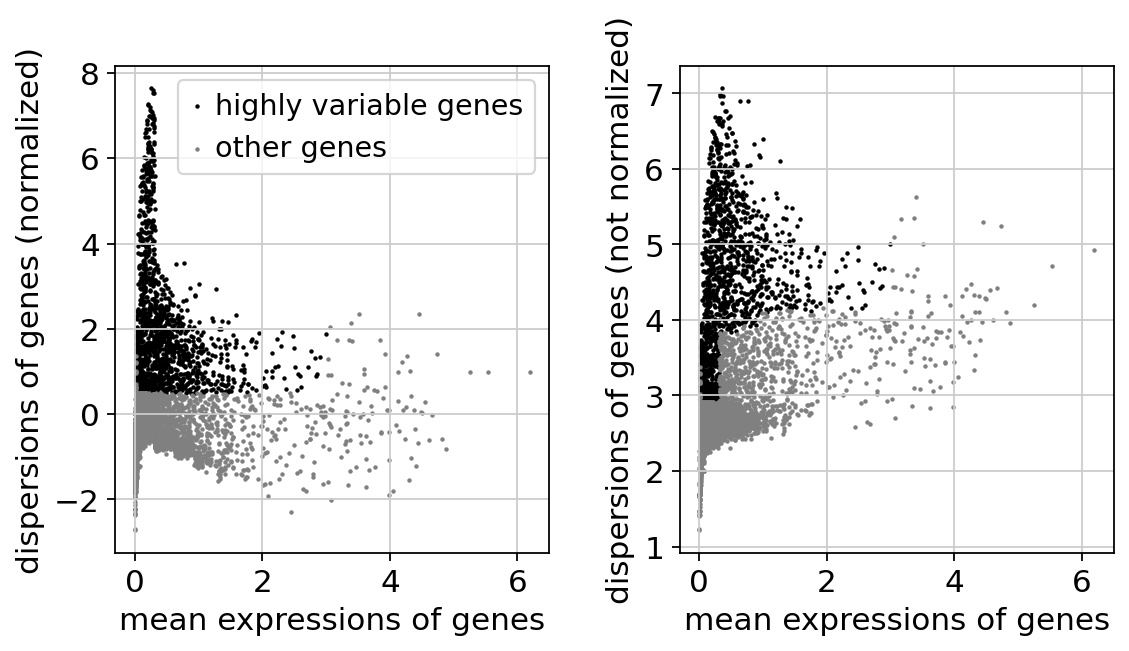

In [63]:
sc.pl.highly_variable_genes(adata)

In [64]:
adata.raw = adata

In [65]:
adata = adata[:, adata.var.highly_variable]

In [66]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'remove' as categorical
/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
Trying to set attribute `.obs` of view, copying.
.

    finished (0:00:14)


In [67]:
sc.pp.scale(adata,max_value=7)

In [68]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


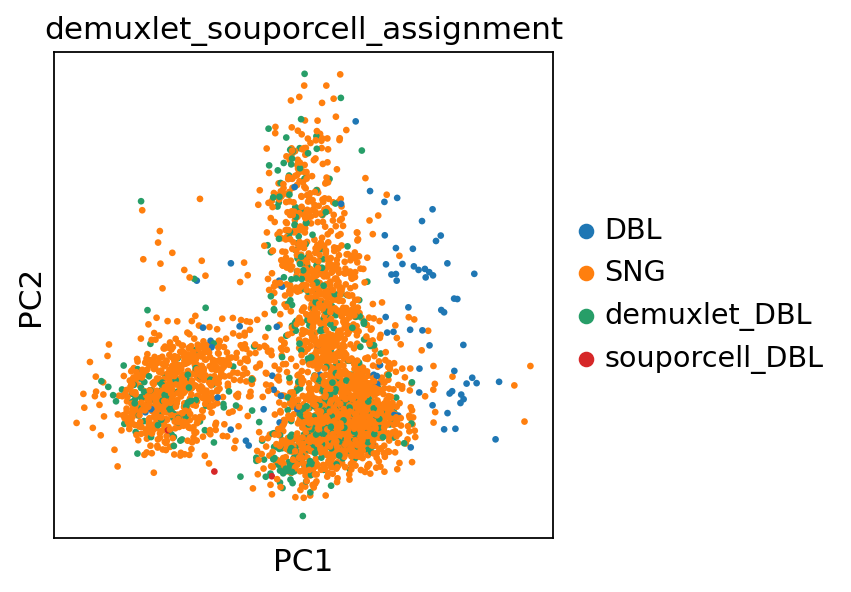

In [69]:
sc.pl.pca(adata, color=['demuxlet_souporcell_assignment'])

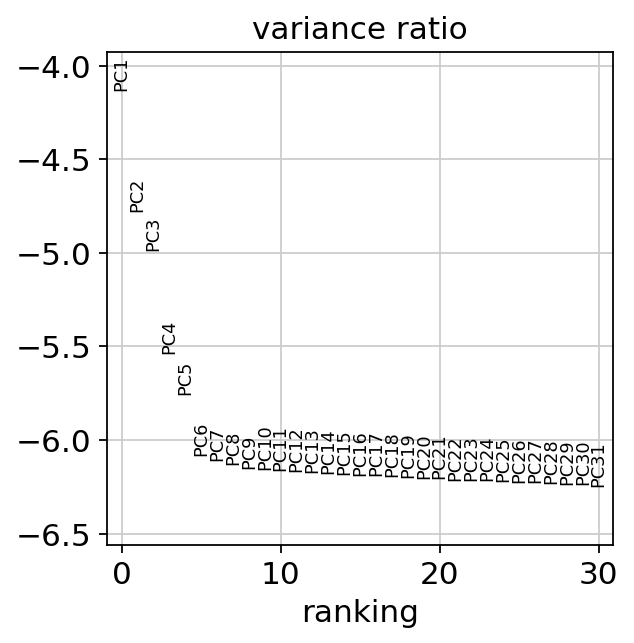

In [70]:
sc.pl.pca_variance_ratio(adata, log=True)


In [71]:
adata.write(results_file)

In [72]:
adata

AnnData object with n_obs × n_vars = 3314 × 1718
    obs: 'demuxlet_assignment', 'souporcell_assignment', 'demuxlet_assignment_simple', 'souporcell_assignment_simple', 'demuxlet_souporcell_assignment', 'sample_assignment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'remove', 'remove_assignment'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'demuxlet_souporcell_assignment_colors'
    obsm: 'X_pca'
    varm: 'PCs'

In [73]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [74]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


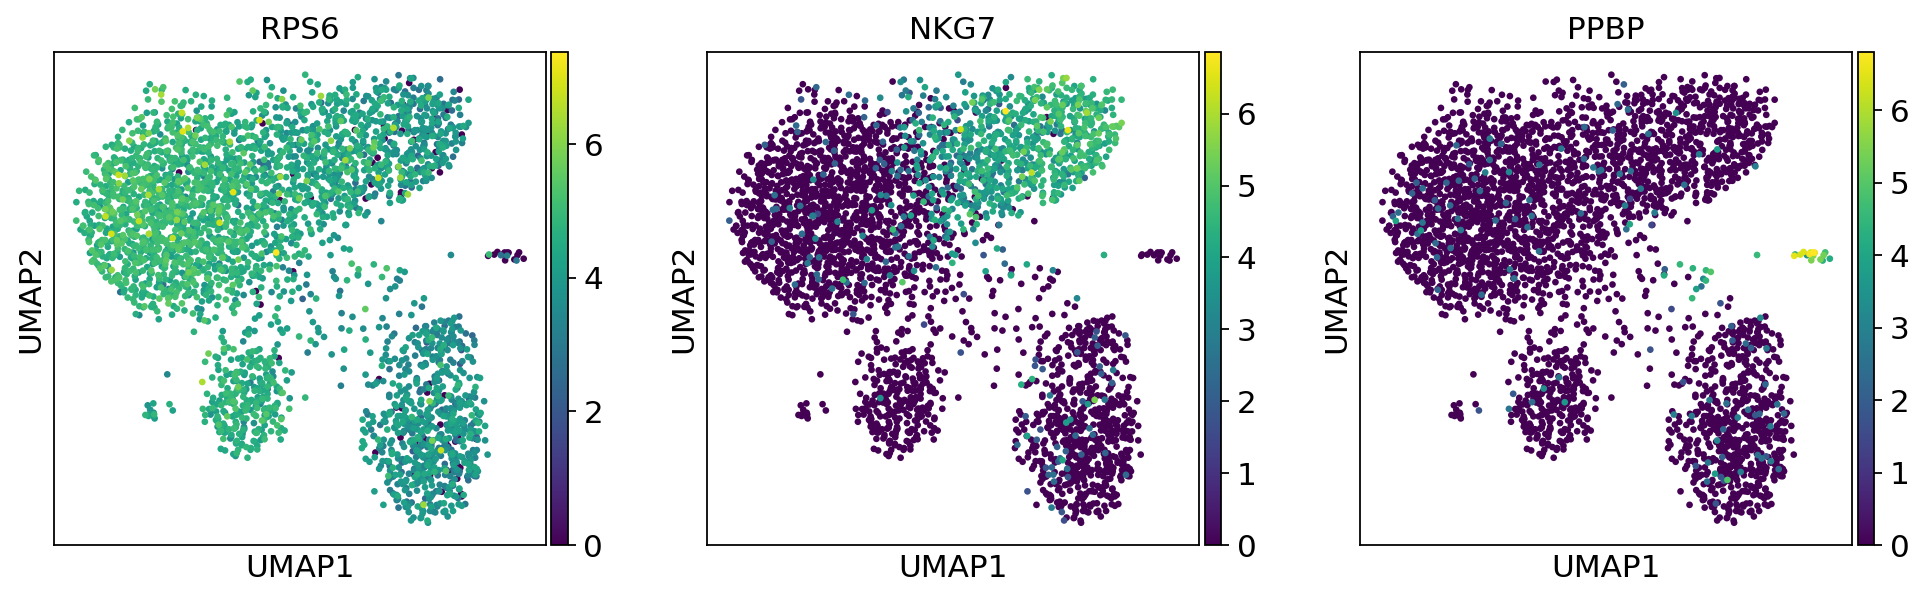

In [75]:
sc.pl.umap(adata, color=['IGKC','IGLC1','IGLC2','IGHD','IGHA1','IGHA2','IGHG1','IGHG2','IGHG3','IGHM','IGHE','CCND1', 'CCND2', 'CCND3','MAF','MAFB','NSD2','GNLY', 'NKG7','CD8A','IL7R','CD79A', 'MS4A1','CD14', 'LYZ','FCGR3A','MS4A7','PPBP','FCER1A','CST3','TNFRSF17','SDC1','DNTT', 'CD19', 'CD34','CD3D','CD27','FGFR3','CD38','FRZB','ITGB7','LAMP5','MZB1','SPP1','TXNIP', 'XBP1','HBB'
, 'souporcell_assignment_simple'], ncols=10)

In [76]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


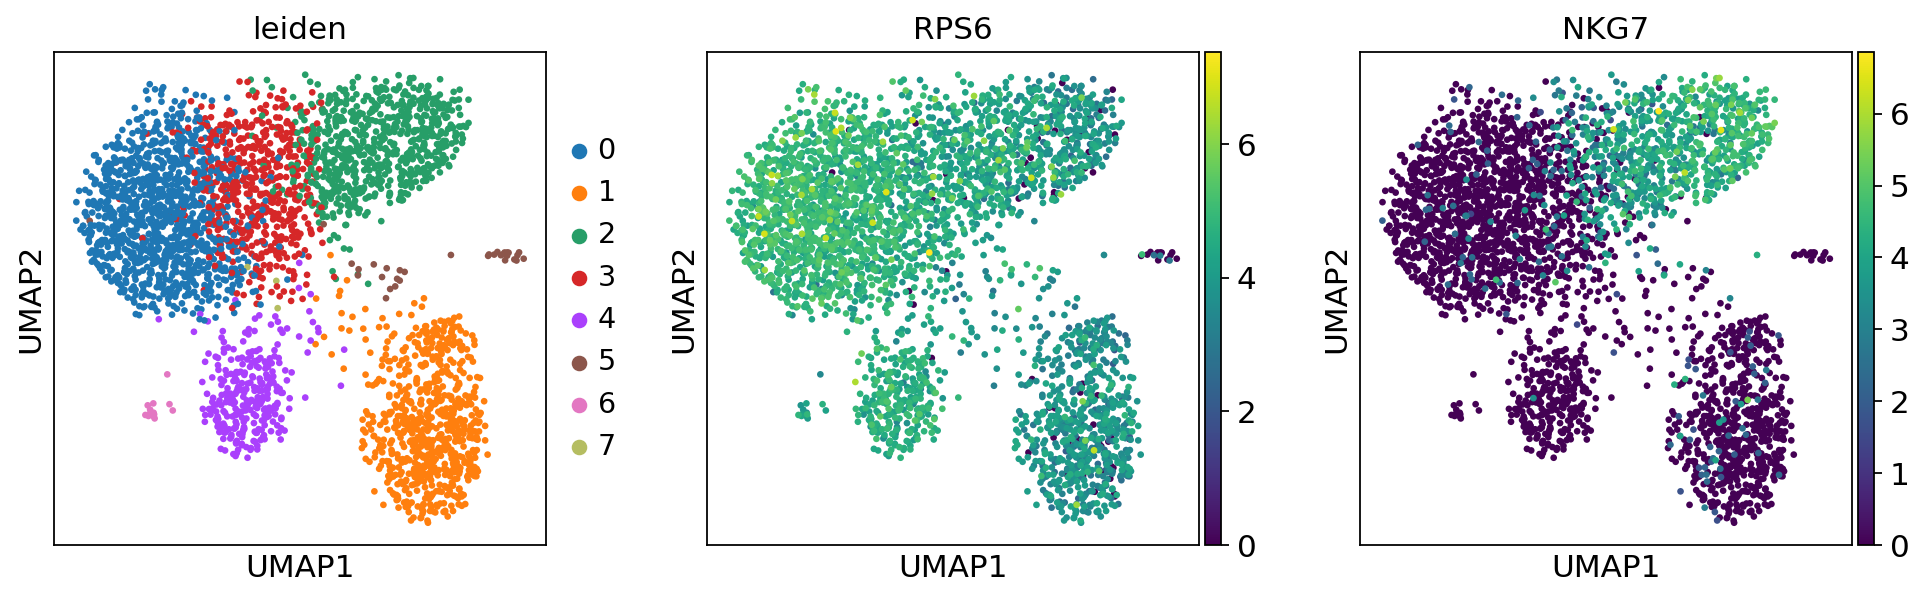

In [77]:
sc.pl.umap(adata, color=['leiden', 'RPS6', 'NKG7'])

In [78]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


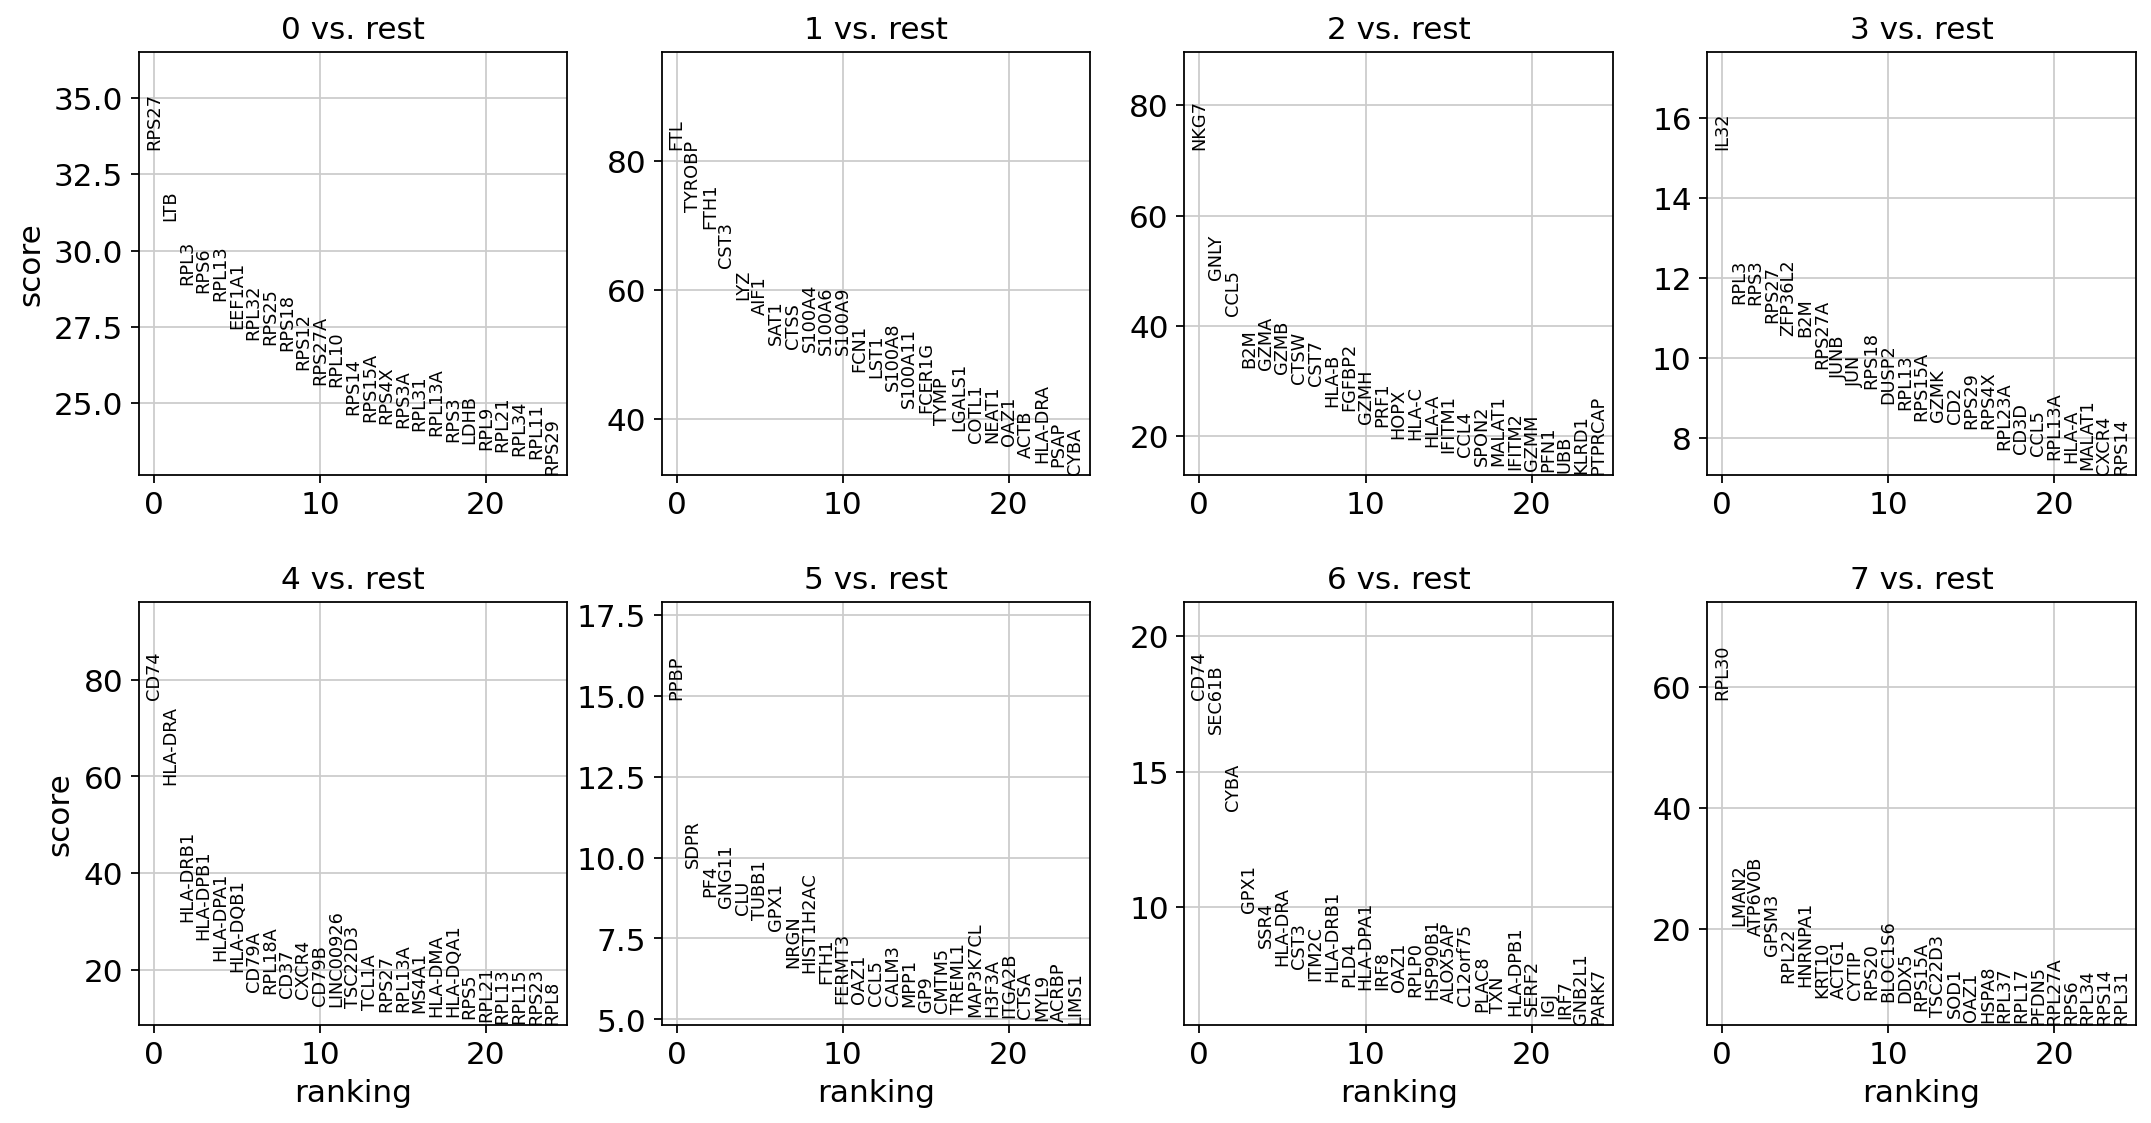

In [79]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [80]:
sc.settings.verbosity = 2  

ranking genes
    finished (0:00:02)


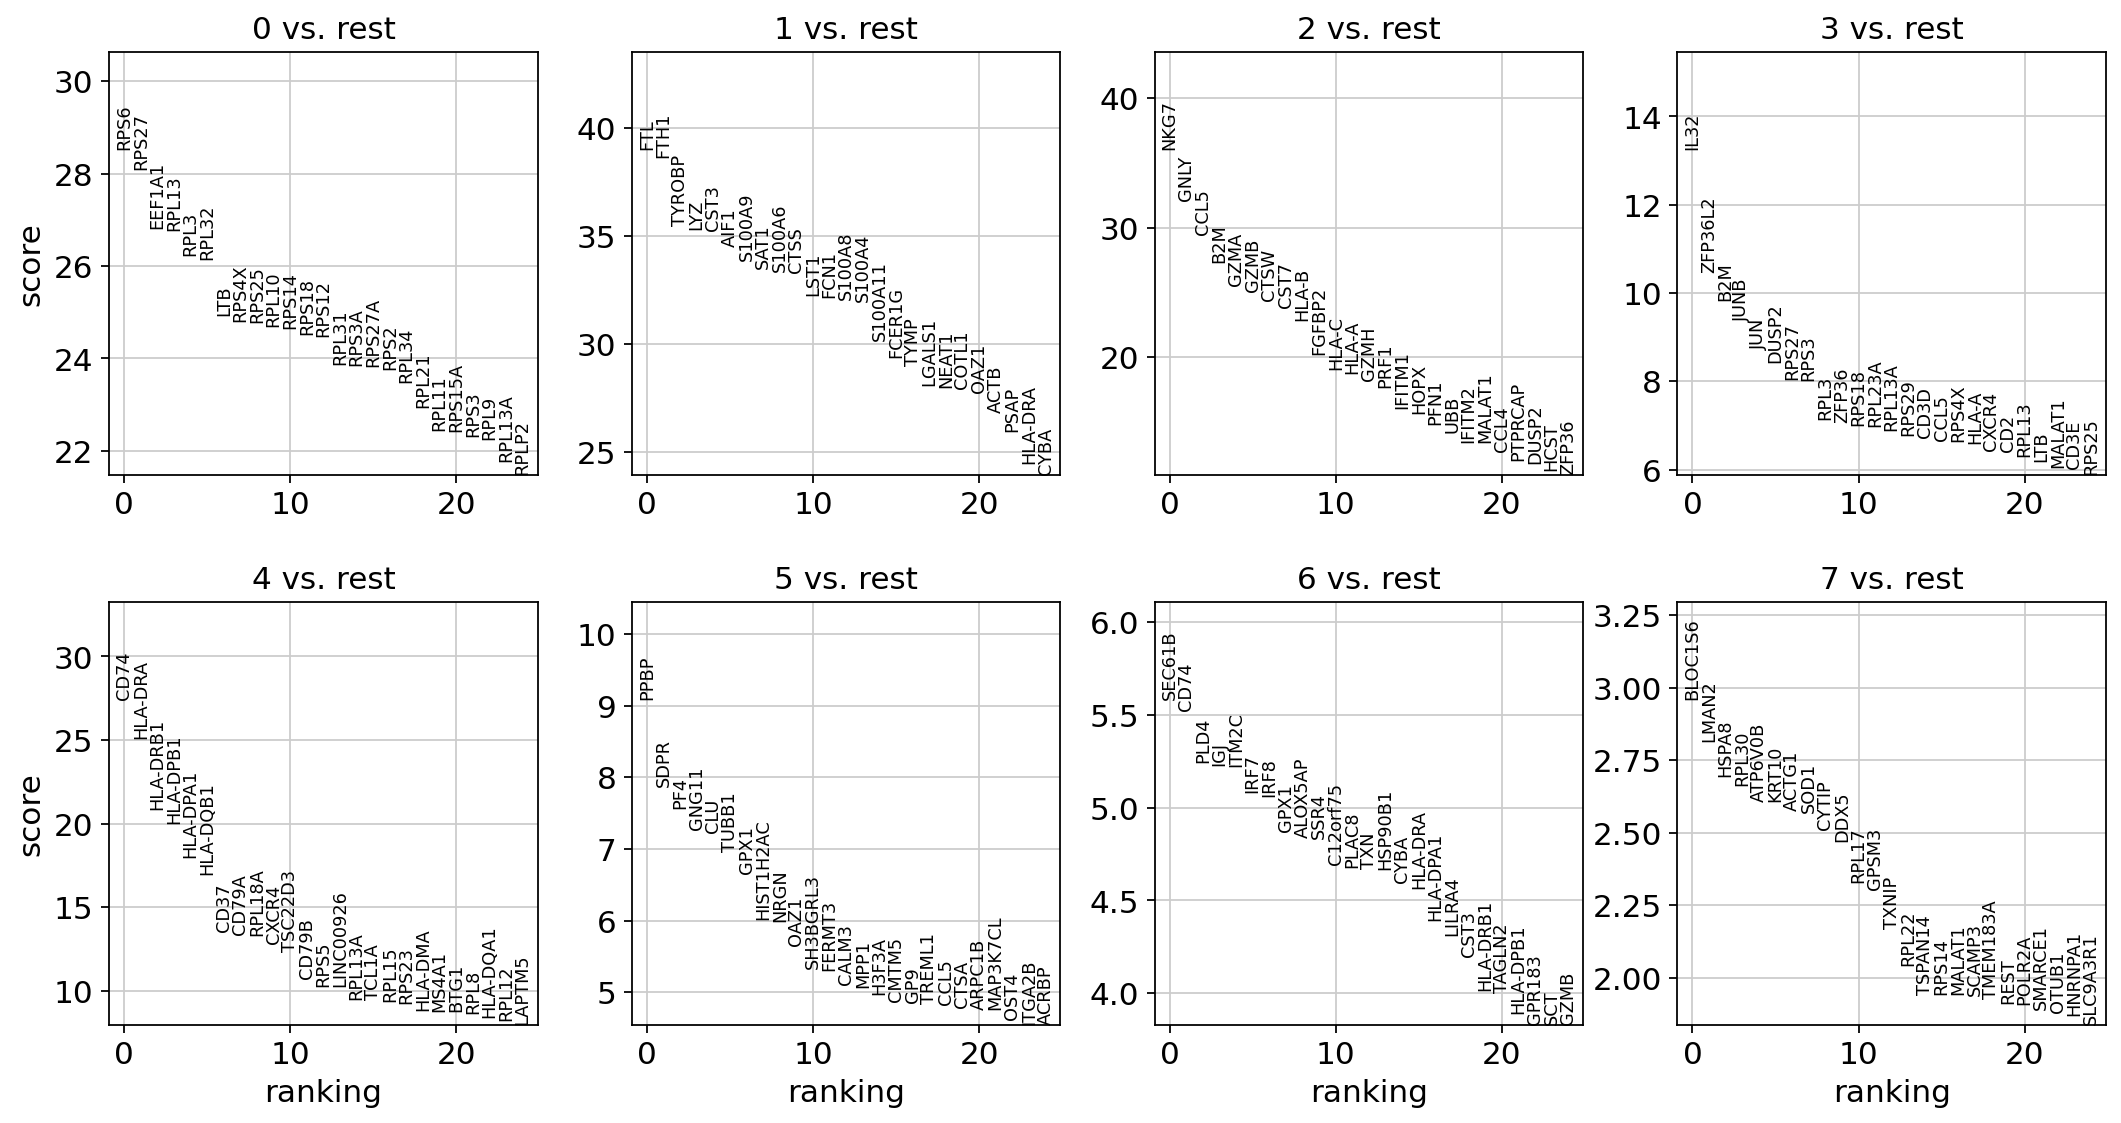

In [81]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [82]:
adata.write(results_file)

ranking genes
    finished (0:00:12)


/home/akivakohane/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


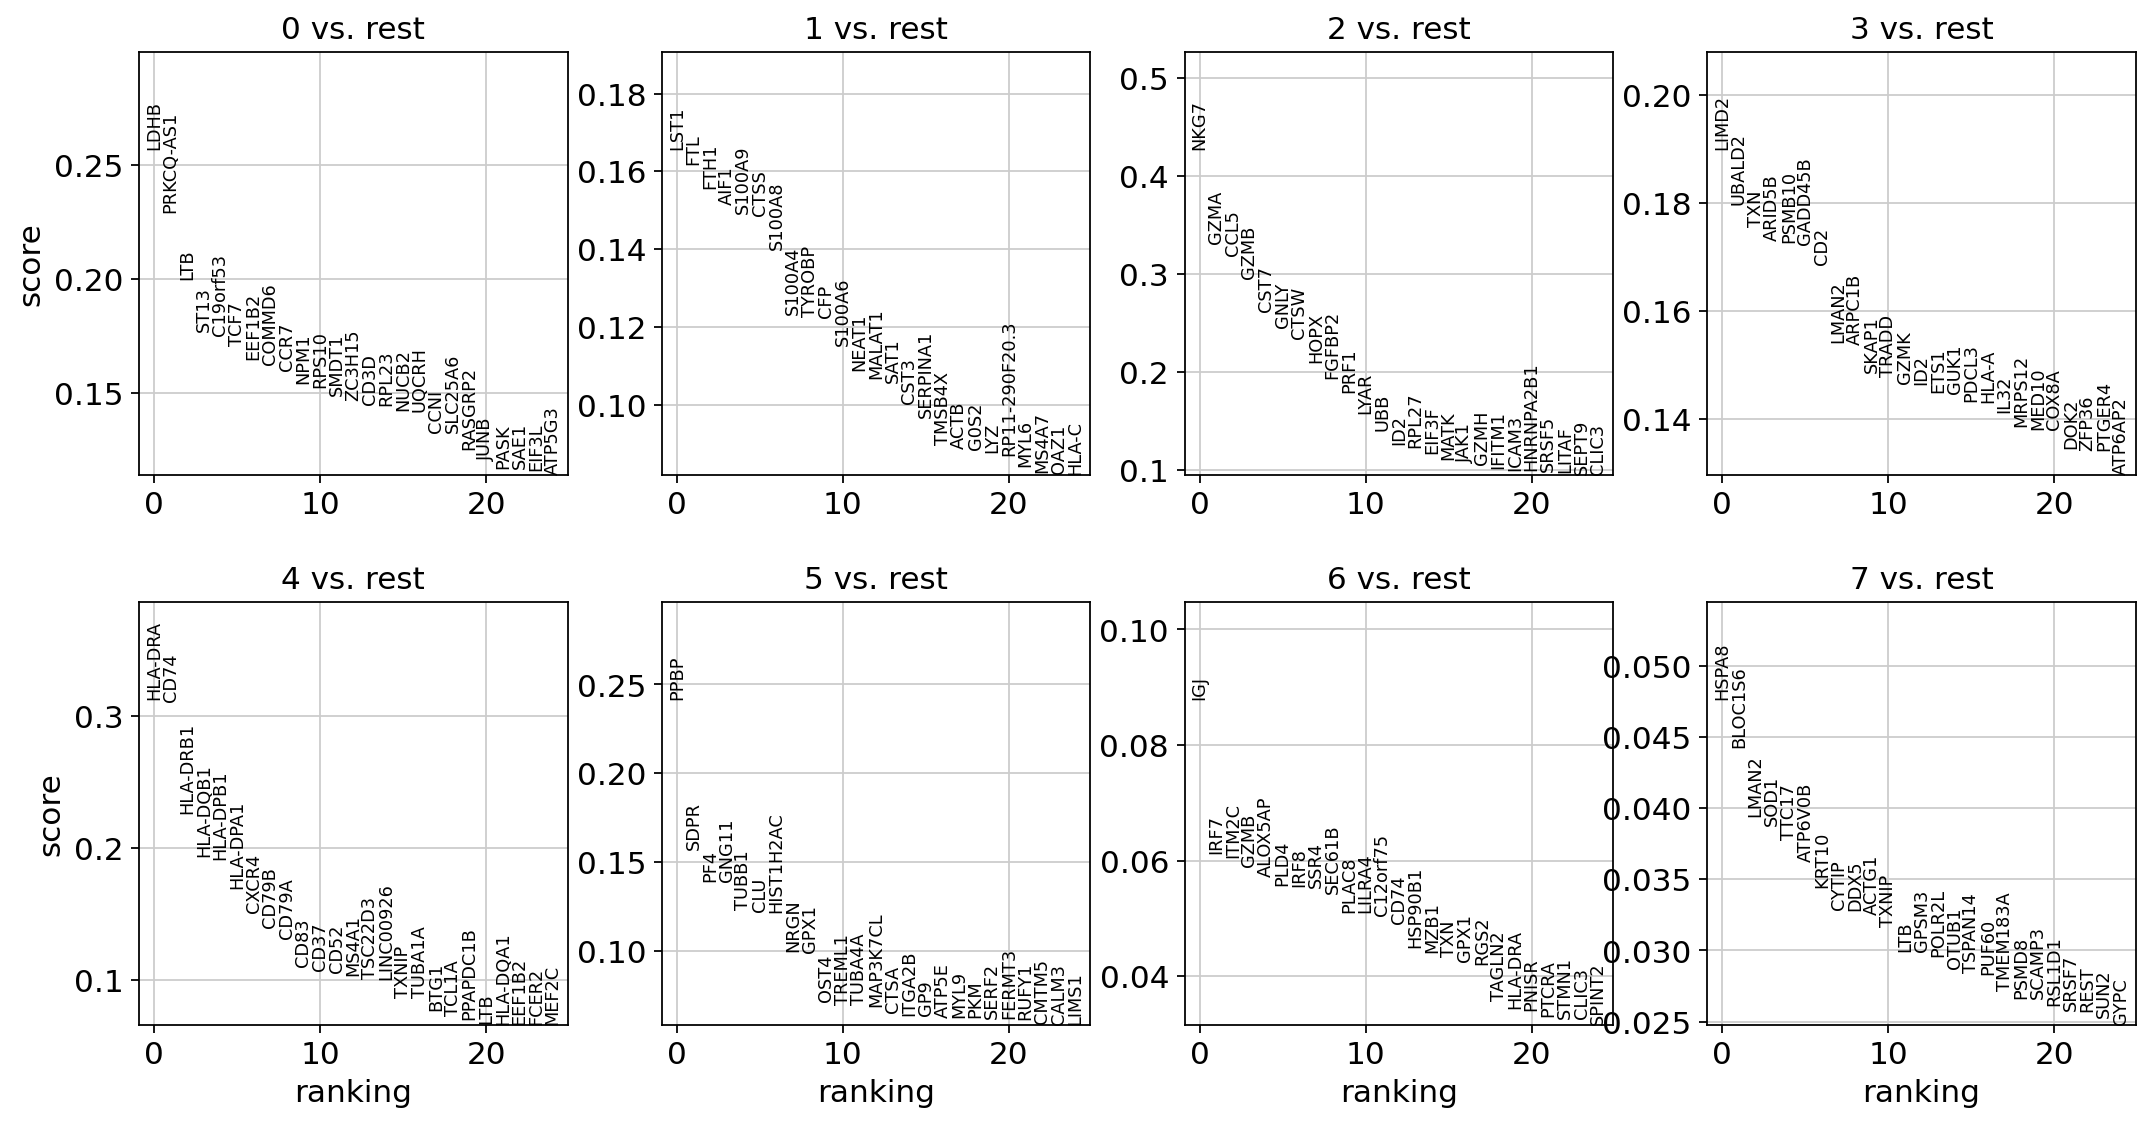

In [83]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [84]:
marker_genes=['RPS6','RPS27','EEF1A1','FTL','LYZ','TYROBP','NKG7','GNLY','IL32','GZMK','CD74','HLA-DRA','PPBP'
              ,'PF4','SEC61B','LMAN2','BLOC1S6']

In [85]:
adata = sc.read(results_file)

In [86]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0       1     2        3         4      5       6        7
0    RPS6     FTL  NKG7     IL32      CD74   PPBP  SEC61B  BLOC1S6
1   RPS27    FTH1  GNLY  ZFP36L2   HLA-DRA   SDPR    CD74    LMAN2
2  EEF1A1  TYROBP  CCL5      B2M  HLA-DRB1    PF4    PLD4    HSPA8
3   RPL13     LYZ   B2M     JUNB  HLA-DPB1  GNG11     IGJ    RPL30
4    RPL3    CST3  GZMA      JUN  HLA-DPA1    CLU   ITM2C  ATP6V0B

In [87]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n            0_p     1_n            1_p   2_n            2_p      3_n  \
0    RPS6  6.220569e-179     FTL   0.000000e+00  NKG7  1.783391e-284     IL32   
1   RPS27  1.479510e-173    FTH1   0.000000e+00  GNLY  3.631532e-226  ZFP36L2   
2  EEF1A1  2.468565e-158  TYROBP  6.778854e-276  CCL5  9.261635e-191      B2M   
3   RPL13  5.676287e-158     LYZ  4.010841e-273   B2M  4.486447e-164     JUNB   
4    RPL3  1.149752e-151    CST3  6.861976e-272  GZMA  8.915939e-144      JUN   

            3_p       4_n            4_p    5_n           5_p     6_n  \
0  4.281114e-40      CD74  8.099225e-166   PPBP  1.000619e-19  SEC61B   
1  1.246496e-25   HLA-DRA  3.883828e-139   SDPR  3.370135e-15    CD74   
2  7.799216e-23  HLA-DRB1   1.725037e-96    PF4  3.819912e-14    PLD4   
3  7.983410e-21  HLA-DPB1   2.131421e-89  GNG11  3.530436e-13     IGJ   
4  2.948061e-18  HLA-DPA1   1.643944e-72    CLU  4.587755e-13   ITM2C   

            6_p      7_n       7_p  
0  2.354775e-08  BLOC1S6  0.003072  
1  3.368962e-08    LMAN2  0.004874  
2  1.571193e-07    HSPA8  0.007042  
3  1.702426e-07    RPL30  0.007714  
4  1.765019e-07  ATP6V0B  0.009086

ranking genes
    finished (0:00:01)


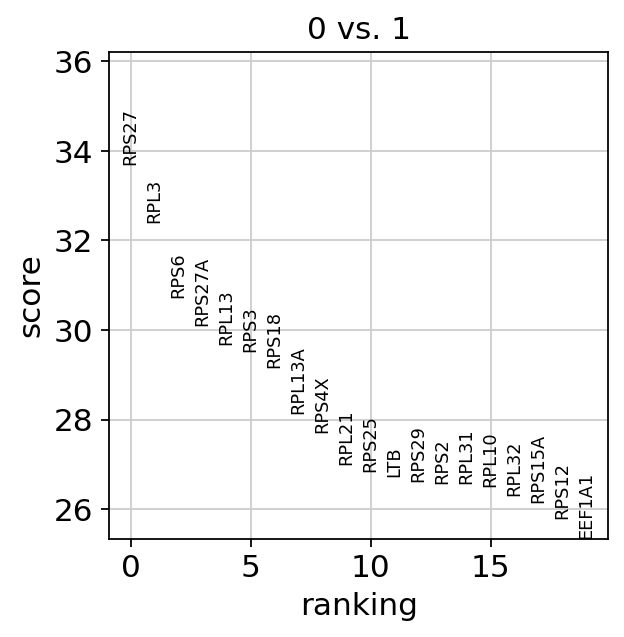

In [88]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

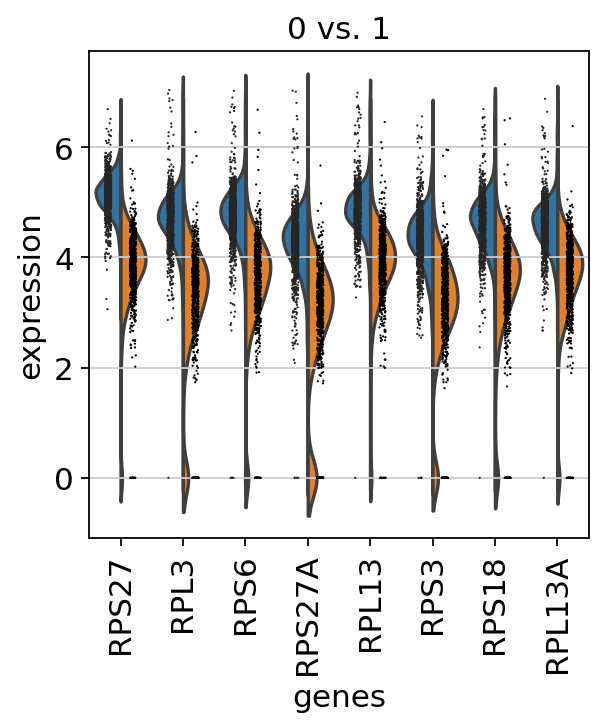

In [89]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [90]:
adata = sc.read(results_file)

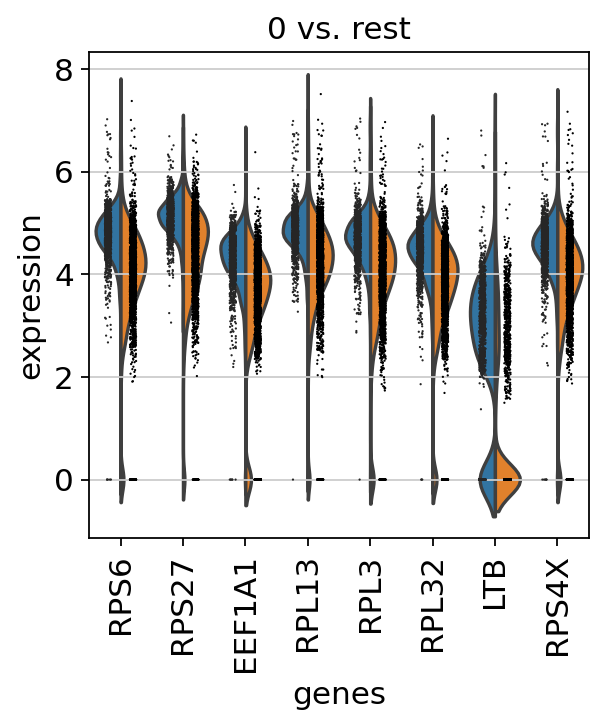

In [91]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

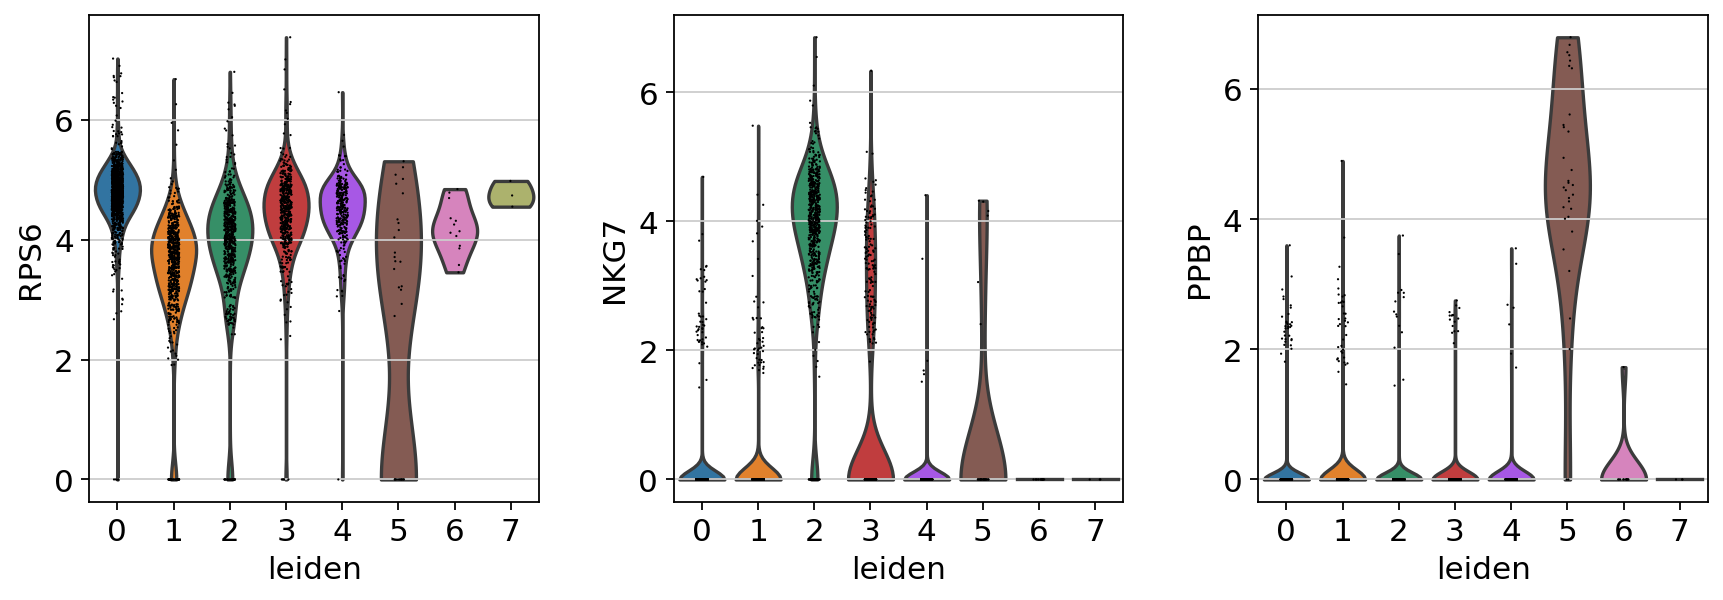

In [92]:
sc.pl.violin(adata, ['RPS6', 'NKG7', 'PPBP'], groupby='leiden')

In [93]:
new_cluster_names = ['CD4 TCM', 'CD14 Mono','NK', 'CD4 TEM','B naive', 'Platelet','pDC', 'Plasmablast']
adata.rename_categories('leiden', new_cluster_names)

/home/akivakohane/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [94]:
leiden_ls=adata.obs['leiden'].to_list()

In [95]:
adata.obs['cell_type'] = leiden_ls

/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical


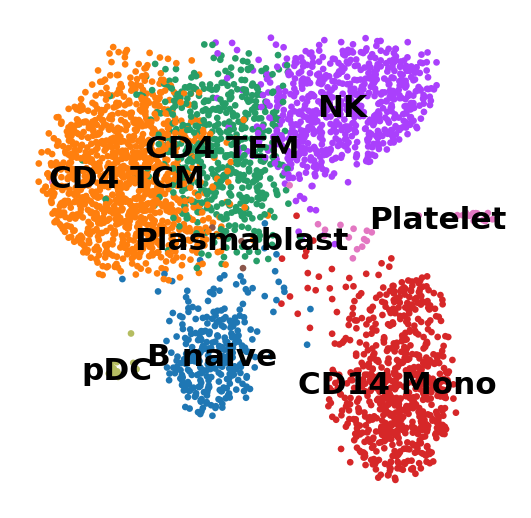

In [96]:
sc.pl.umap(adata, color= 'cell_type', legend_loc='on data', title='', frameon=False, save='.pdf')

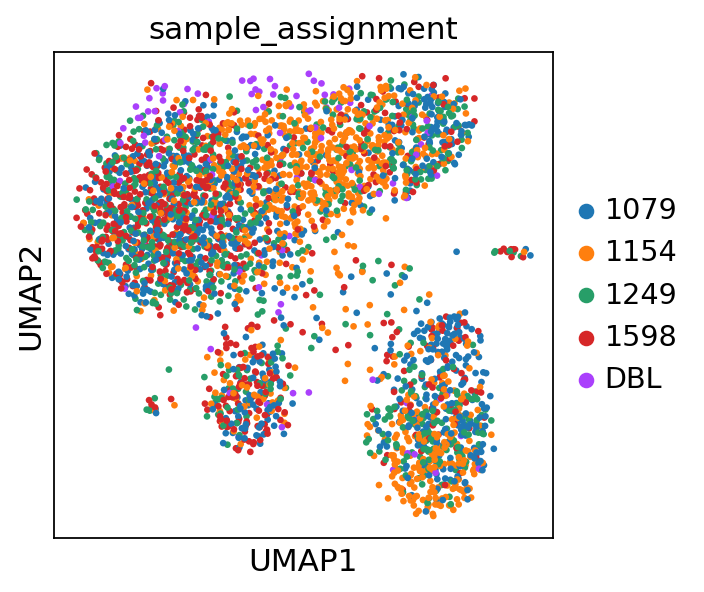

In [97]:
sc.pl.umap(adata, color= 'sample_assignment')

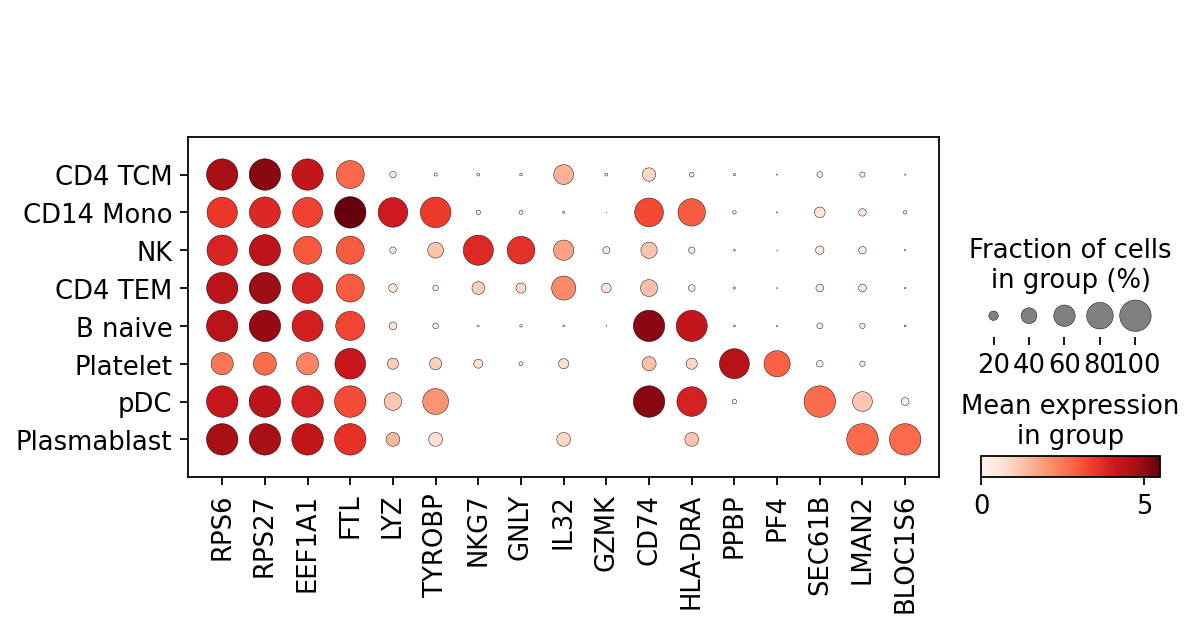

In [98]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

In [99]:
adata.obs['sample_assignment'].value_counts(normalize=True) * 100

1154    27.368739
1079    25.316838
1249    22.329511
1598    21.997586
DBL      2.987326
Name: sample_assignment, dtype: float64

In [100]:
adata.obs['sample_assignment'].value_counts()

1154    907
1079    839
1249    740
1598    729
DBL      99
Name: sample_assignment, dtype: int64

In [101]:
adata.obs['cell_type'].value_counts(normalize=True) * 100

CD4 TCM        33.041642
CD14 Mono      20.881110
NK             20.096560
CD4 TEM        15.570308
B naive         8.961979
Platelet        0.965600
pDC             0.392275
Plasmablast     0.090525
Name: cell_type, dtype: float64

In [102]:
sample_assign2 = adata.obs['sample_assignment'].to_list()

In [103]:
s1154 = []
s1079 = []
s1249 = []
s1598 = []
DBL= []
count=0
for t in sample_assign2:
    if sample_assign2[count] == '1154':
        s1154.append(leiden_ls[count])
    elif sample_assign2[count] == '1079':
        s1079.append(leiden_ls[count])
    elif sample_assign2[count] == '1249':
        s1249.append(leiden_ls[count])
    elif sample_assign2[count] == '1598':
        s1598.append(leiden_ls[count])
    else:
        DBL.append(leiden_ls[count])
    count+=1

In [104]:
samples=[s1154,s1079,s1249,s1598,DBL]
samples_df=pd.DataFrame(samples)
samples_df=samples_df.T
samples_df.columns=['1154','1079','1249','1598','DBL']

In [105]:
samples_df['1154'].value_counts(normalize=True) * 100

NK           30.540243
CD14 Mono    25.578831
CD4 TEM      21.719956
CD4 TCM      15.986770
B naive       5.402426
Platelet      0.551268
pDC           0.220507
Name: 1154, dtype: float64

In [106]:
samples_df['1079'].value_counts(normalize=True) * 100

CD4 TCM      33.849821
CD14 Mono    28.128725
NK           14.660310
CD4 TEM      12.514899
B naive       9.773540
Platelet      0.834327
pDC           0.238379
Name: 1079, dtype: float64

In [107]:
samples_df['1249'].value_counts(normalize=True) * 100


CD4 TCM        38.513514
NK             20.540541
CD14 Mono      18.918919
CD4 TEM        13.378378
B naive         6.351351
Platelet        1.351351
pDC             0.675676
Plasmablast     0.270270
Name: 1249, dtype: float64

In [108]:
samples_df['1598'].value_counts(normalize=True) * 100

CD4 TCM      48.285322
B naive      15.089163
CD4 TEM      13.443073
NK           11.248285
CD14 Mono    10.013717
Platelet      1.371742
pDC           0.548697
Name: 1598, dtype: float64

In [109]:
samples_df['DBL'].value_counts(normalize=True) * 100

NK             32.323232
CD4 TCM        29.292929
CD4 TEM        17.171717
CD14 Mono      11.111111
B naive         9.090909
Plasmablast     1.010101
Name: DBL, dtype: float64

In [110]:
CD4_TCM=[] 
CD14_Mono=[]
NK=[] 
CD4_TEM=[]
B_naive=[] 
Platelet=[]
pDC=[] 
Plasmablast=[]
cell_type_ls=[CD4_TCM,CD14_Mono,NK,CD4_TEM,B_naive,Platelet,pDC,Plasmablast]
count=0
for cell in new_cluster_names:
    count2=0
    for t in leiden_ls:
        if leiden_ls[count2] == cell:
            cell_type_ls[count].append(sample_assign2[count2])
        count2+=1
    count+=1


In [111]:
cell_type_df=pd.DataFrame(cell_type_ls)
cell_type_df=cell_type_df.T
cell_type_df.columns=new_cluster_names
cell_type_df.head()

CD4 TCM CD14 Mono    NK CD4 TEM B naive Platelet   pDC Plasmablast
0    1079      1154  1154    1154    1079     1249  1249        1249
1    1598      1079  1079    1598    1079     1598  1249         DBL
2    1598      1079  1079    1154    1079     1249  1079        1249
3    1154      1154  1154    1598    1079     1598  1249        None
4    1154      1079  1598    1154    1079     1598  1598        None

In [112]:
for cellt in new_cluster_names:
    print(cell_type_df[cellt].value_counts())

1598    352
1249    285
1079    284
1154    145
DBL      29
Name: CD4 TCM, dtype: int64
1079    236
1154    232
1249    140
1598     73
DBL      11
Name: CD14 Mono, dtype: int64
1154    277
1249    152
1079    123
1598     82
DBL      32
Name: NK, dtype: int64
1154    197
1079    105
1249     99
1598     98
DBL      17
Name: CD4 TEM, dtype: int64
1598    110
1079     82
1154     49
1249     47
DBL       9
Name: B naive, dtype: int64
1249    10
1598    10
1079     7
1154     5
Name: Platelet, dtype: int64
1249    5
1598    4
1079    2
1154    2
Name: pDC, dtype: int64
1249    2
DBL     1
Name: Plasmablast, dtype: int64


In [113]:
for cellt in new_cluster_names:
    print(cell_type_df[cellt].value_counts(normalize=True) * 100)

1598    32.146119
1249    26.027397
1079    25.936073
1154    13.242009
DBL      2.648402
Name: CD4 TCM, dtype: float64
1079    34.104046
1154    33.526012
1249    20.231214
1598    10.549133
DBL      1.589595
Name: CD14 Mono, dtype: float64
1154    41.591592
1249    22.822823
1079    18.468468
1598    12.312312
DBL      4.804805
Name: NK, dtype: float64
1154    38.178295
1079    20.348837
1249    19.186047
1598    18.992248
DBL      3.294574
Name: CD4 TEM, dtype: float64
1598    37.037037
1079    27.609428
1154    16.498316
1249    15.824916
DBL      3.030303
Name: B naive, dtype: float64
1249    31.250
1598    31.250
1079    21.875
1154    15.625
Name: Platelet, dtype: float64
1249    38.461538
1598    30.769231
1079    15.384615
1154    15.384615
Name: pDC, dtype: float64
1249    66.666667
DBL     33.333333
Name: Plasmablast, dtype: float64


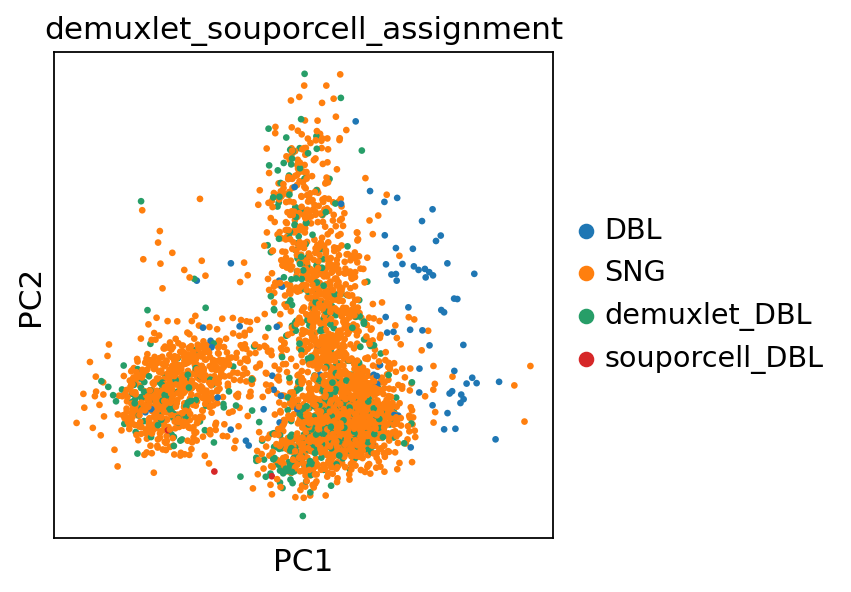

In [114]:
sc.pl.pca(adata, color=['demuxlet_souporcell_assignment'])

In [115]:
adata= adata[~adata.obs['demuxlet_souporcell_assignment'].str.startswith('DBL', na=False)]

In [116]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


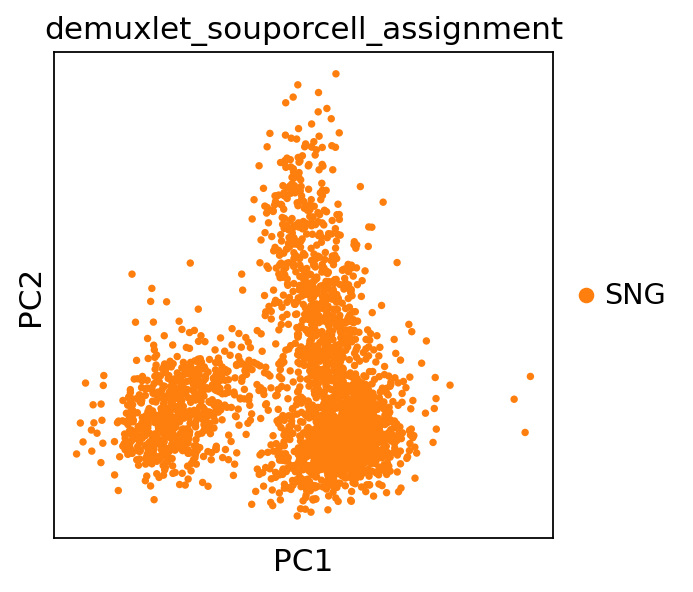

In [117]:
sc.pl.pca(adata, color=['demuxlet_souporcell_assignment'])